# Análisis de patrones de éxito en videojuegos para planificación publicitaria
## Caso de estudio de Ice Store 2016-2017  
La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Debemos identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Contamos con datos que se remontan a 2016. Con esta información trataremos de crear una campaña para 2017.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Objetivo del proyecto
El objetivo de este proyecto, es determinar cuál es el mejor plan publicitario para la campaña del año 2017 con respecto a las ventas obtenidas en 2016.


## Inicialización

In [2]:
# importamos las librerías necesarias
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
# cargamos los datos del dataset
df_games = pd.read_csv('./dataset/games.csv')

In [4]:
# mostramos el contenido del dataframe obtenido
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Descripción de datos:  
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género) 
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
* EU_sales (ventas en Europa en millones de dólares estadounidenses) 
* JP_sales (ventas en Japón en millones de dólares estadounidenses) 
* Other_sales (ventas en otros países en millones de dólares estadounidenses) 
* Critic_Score (máximo de 100) 
* User_Score (máximo de 10) 
* Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Preparación de los datos

Convertiremos los nombres de las columnas a minúsculas para tener un código sintácticamente consistente.

In [5]:
df_games.columns=df_games.columns.str.lower()
df_games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Vemos cúal es el tipo de datos para cada columna y si hay valores ausentes.

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Tipos de datos y valores ausentes
Vemos que hay valores ausentes en la columna name, year_of_release, genre, critic_score, user_score y rating.  
Además debemos corregir los tipos de datos para las columnas year_of_release, ya que contiene años sin decimales, y user_score, que contiene calificaciones con punto decimal. 

#### Nombre y genero

In [8]:
# valores ausentes para la columna 'name'
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# valores ausentes para la columna 'genre'
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Vemos que los valores ausentes de las columnas 'name' y 'genre' se tratan de los mismos casos, los cuales solo son dos. Eliminar estos registros no representará un cambio significativo en las estadísticas, además de que no contienen información suficiente para nuestro análsis.

In [10]:
# eliminamos los vales ausentes para las columnas 'name' y 'genre'
df_games=df_games.dropna(subset=['name','genre'])

#### Año de lanzamiento

In [11]:
# obtenemos una muestra de los registros sin año de lanzamiento
df_games[df_games['year_of_release'].isna()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [12]:
# contamos el número de valores ausentes
df_games['year_of_release'].isna().sum()

269

La columna ‘year_of_release’ tiene 269 valores ausentes, algunos de los cuales contiene otros datos que nos podrían ser de utilidad. Sin embargo, no es un dato que pueda deducirse fácilmente a partir de otros valores así que asignaremos 0 a los registros con años faltantes para que no sean tomados en cuenta en los análsis de tiempo pero puedan ser utilizados en otros casos.

In [13]:
df_games.fillna({'year_of_release':0}, inplace=True)

Verifiquemos si podemos hacer la conversión de float a int para la columna 'year_of_release'

In [14]:
print(np.array_equal(df_games['year_of_release'],df_games['year_of_release'].astype('int')))

True


Es seguro convertir la columna de año de lanzamiento a tipo entero, ya que no contiene valores con punto decimal.

In [15]:
# hacemos la conversión
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

####  Puntuación de la crítica y puntuación de los usuarios

Revisemos los valores ausentes para las puntuaciones.

In [16]:
# visualizamos el número de valores ausentes y tbd para la puntuación del usuario
print(df_games['user_score'].value_counts(dropna=False).head())

user_score
NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
Name: count, dtype: int64


Los juegos que tienen una puntuación de los usuarios ‘por determinar’ (tbd) también los trataremos como datos ausentes. Por esta razón, les asignaremos el valor 'NaN'.

In [17]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan) # asignamos NaN a los juegos con tbd

In [18]:
print('valores ausentes en critic_score:',df_games['critic_score'].isna().sum())
print('valores ausentes en user_score:',df_games['user_score'].isna().sum())

valores ausentes en critic_score: 8576
valores ausentes en user_score: 9123


Los valores ausentes de las columnas 'critic_score' y 'user_score', indican que los juegos no recibieron una puntuación, por parte de los usuarios o la crítica, pero aún conservan otros datos. Por otro lado, no podemos sustituir estos valores con 0, pues esto sesgará los resultados a la izquierda, así que usaremos una medida de tendencia central.  
Realizaremos un estudio de la distribución de los datos para decidir que medida será mejor para sustituir los valores ausentes.

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

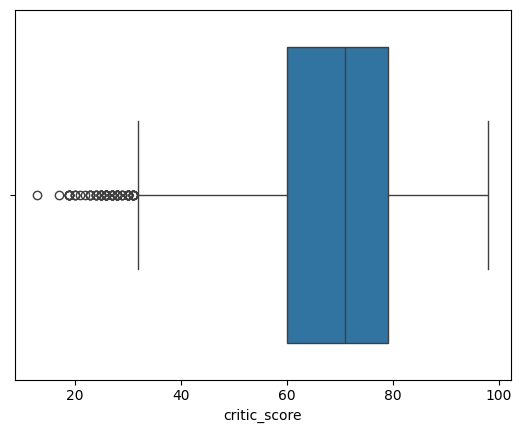

In [19]:
sns.boxplot(x=df_games['critic_score'])
df_games['critic_score'].describe()

In [20]:
# convertimos el tipo de datos de la columna 'user_score' de 'object' a 'float' para que los datos sean representados adecuadamente
df_games['user_score'] = df_games['user_score'].astype('float')

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

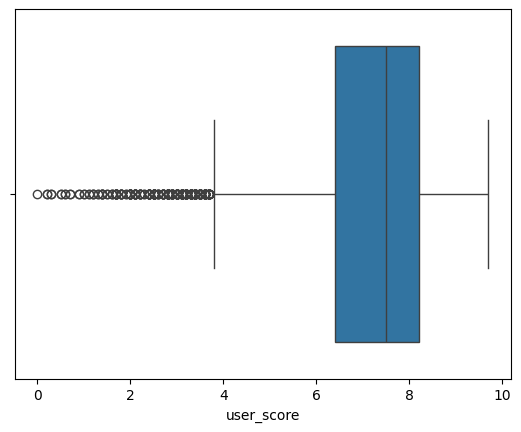

In [21]:
sns.boxplot(x=df_games['user_score'])
df_games['user_score'].describe()


Se puede observar que ambos campos presentan valores atípicos. Por ello, el uso de la media podría introducir un sesgo en los datos. En este escenario, la mediana será la opción más adecuada. No obstante, el asignar un único valor a todos los valores ausentes, podría sesgar los datos, dado que constituyen cerca del 40% del total de los datos correspondientes a la puntuación. Por ello, lo mejor será asignar una mediana acorde a una característica en particular.

Veamos si la puntuación de la crítica tiene una diferencia significativa para cada plataforma.

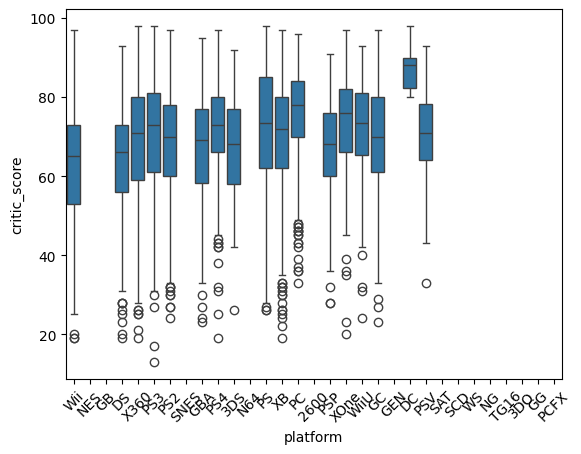

In [22]:
sns.boxplot(x='platform', y='critic_score', data=df_games)
plt.xticks(rotation=45)
plt.show()

Observamos que de las 31 plataformas, solo 17 de ellas tienen datos suficientes para realizar un diagráma de caja, filtremos estos datos.

In [23]:
# obtenemos las plataformas con una puntuación total mayor a cero
platform_with_critic_score = df_games.groupby('platform')['critic_score'].sum()>0

In [24]:
# filtramos las plataformas y obtenemos su nombre
platform_with_critic_score = platform_with_critic_score[platform_with_critic_score].index

In [25]:
# obtenemos un nuevo dataframe
df_games_platforms = df_games[df_games['platform'].isin(platform_with_critic_score)]

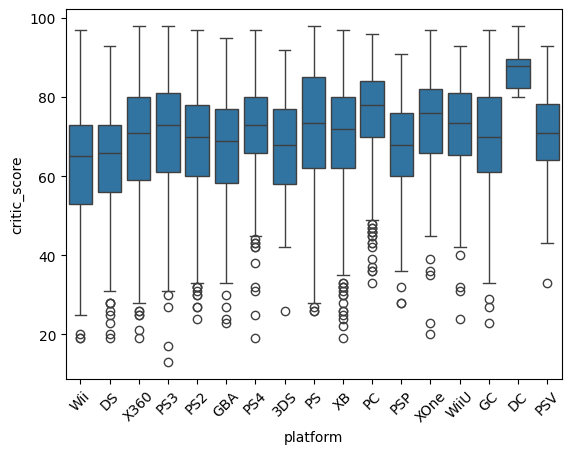

In [26]:
sns.boxplot(x='platform', y='critic_score', data=df_games_platforms)
labels = df_games['platform'].round(0).unique()
plt.xticks(rotation=45)
plt.show()

La puntuación tiene una variación con respecto a las consolas; sin embargo, no podemos realizar una asignación para las puntuaciones ausentes, dado que existen plataformas que no contienen una sola puntuación. Por lo tanto, no podremos obtener ninguna métrica de tendencia central. Exploremos la distribución con respecto a los generos.

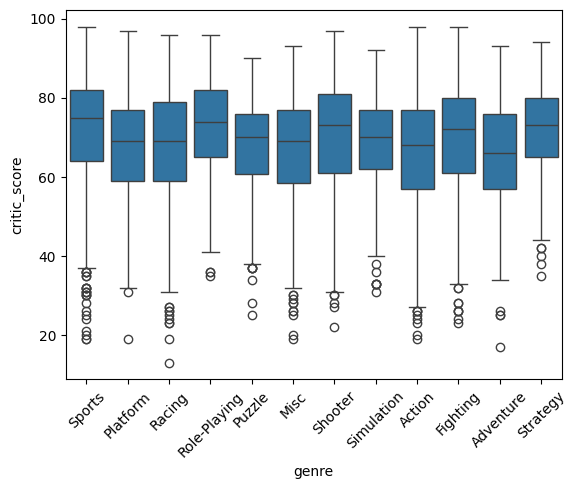

In [27]:
sns.boxplot(x='genre', y='critic_score', data=df_games)
plt.xticks(rotation=45)
plt.show()

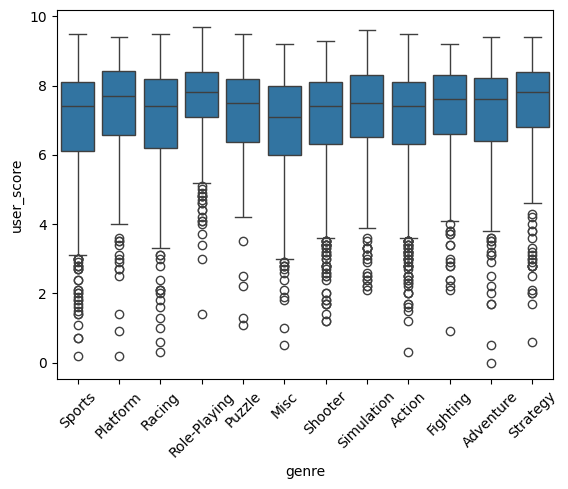

In [28]:
sns.boxplot(x='genre', y='user_score', data=df_games)
plt.xticks(rotation=45)  # Mostrar cada 5 etiquetas
plt.show()

Todos los generos cuantan con una respectiva distribución en cuanto a las puntuaciones y esta distribución tiene una variación suficiente para asignar una mediana diferente a cada sección sin sesgar el conjunto de datos.

In [29]:
# función para asignar una puntuación de la crítica dependiendo del genero
def critic_score_median(genre):
    return df_games[df_games['genre']==genre]['critic_score'].median()

In [30]:
# función para asignar una puntuación de los usuarios dependiendo del genero
def user_score_median(genre):
    return df_games[df_games['genre']==genre]['user_score'].median()

In [31]:
# aplicamos las funciones para la sustitución de las puntuaciones ausentes
missing_critic_score = df_games['critic_score'].isna()
missing_user_score = df_games['user_score'].isna()

df_games.loc[missing_critic_score, 'critic_score'] = df_games.loc[missing_critic_score, 'genre'].apply(critic_score_median)
df_games.loc[missing_user_score, 'user_score'] = df_games.loc[missing_user_score, 'genre'].apply(user_score_median)

#### Clasificación ESRB

In [32]:
print('Valores ausentes en la columna "rating":',df_games['rating'].isna().sum())

Valores ausentes en la columna "rating": 6764


In [33]:
df_games[df_games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,70.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,NaN


Para el caso especifico de la clasificación, no podemos asignarles una categoría específica a los videojuegos con valores ausentes. Hacerlo podría distorsionar las estadísticas y sesgarlas a favor del género elegido. Además no se muestra un patrón claro con respecto a otras carácterísticas.  
Por esto asignaremos una clasificación a estos registros con respecto a la clasificación ESRB más popular para cada genero.

In [34]:
def rating_ESRB(genre):
    return df_games[df_games['genre']==genre]['rating'].value_counts().idxmax()

In [35]:
missing_ratings = df_games['rating'].isna()

df_games.loc[missing_ratings, 'rating'] = df_games.loc[missing_ratings, 'genre'].apply(rating_ESRB)

In [36]:
# vemos el dataframe resultante después de las transformaciones
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


### Ventas totales
Calcularemos las ventas totales para cada juego, sumando las ventas de cada región y crearemos una nueva columna con ese dato.

In [37]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games['total_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64


## Análisis de datos

### Lanzamientos anuales  

Graficaremos el número de videojuegos lanzados por año para ver si existe algún patrón o diferencia significativa.

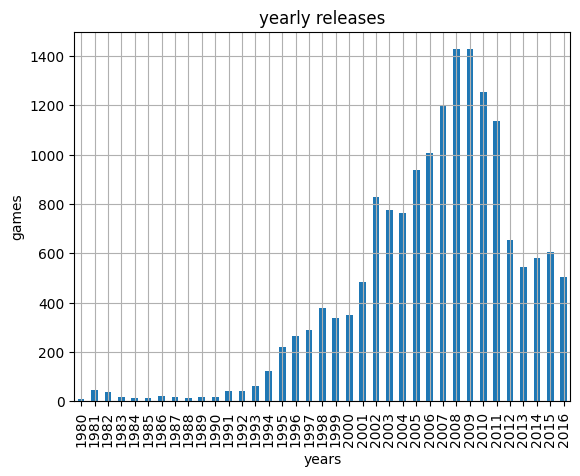

In [38]:
games_per_year = df_games[df_games['year_of_release']>0]['year_of_release'].value_counts().sort_index()
games_per_year.plot(
    kind='bar', 
    title='yearly releases', 
    xlabel='years',
    ylabel='games',
    grid=True
)
plt.show()

Entre 2002 y 2011, hubo un auge en el lanzamiento de videojuegos. En los años más recientes, el número de lanzamientos se ha reducido y se ha mantenido en un promedio aproximado de 500 a 600 juegos por año.

### Plataformas
Realizaremos un análisis con respecto a los datos anuales de las plataformas con mayores ventas. Con estos resultados, veremos el incremento o la disminución en las ventas de cada plataforma atravez de los años.  
Con el objetivo de obtener resultados más significativos, nos centraremos únicamente en el período de 2011 a 2016, ya que el objetivo de este proyecto es obtener un plan de negocio para obtener mejores ventas en 2017 y lo mejor será tener información actualizada.  

In [39]:
# Obtenemos una lista de las plataformas con mejores ventas en los últimos años
df_last_games = df_games[df_games['year_of_release']>=2011] # filtramos los videjuegos más recientes
df_platforms = df_last_games.groupby('platform')['total_sales'].sum().sort_values()
print(df_platforms)

platform
PS2       0.45
PSP      29.01
DS       38.73
PSV      53.81
WiiU     82.19
Wii      95.02
PC       97.68
XOne    159.32
3DS     257.81
PS4     314.14
X360    380.38
PS3     445.57
Name: total_sales, dtype: float64


In [40]:
# obtenemos las ventas de los lanzamientos anuales (2011 en adelante), agrupados por plataforma
df_platforms_per_year = df_last_games.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
df_platforms_per_year.head(10)

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,DS,2011,26.18
7,DS,2012,11.01
8,DS,2013,1.54
9,PC,2011,35.03


In [41]:
# Transformamos las plataformas en columnas y los años en índices
pivot_platforms_per_year = df_platforms_per_year.pivot_table(index='year_of_release', columns='platform', values='total_sales')
pivot_platforms_per_year

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<Axes: title={'center': 'Yearly Sales'}, xlabel='years', ylabel='sales (MD)'>

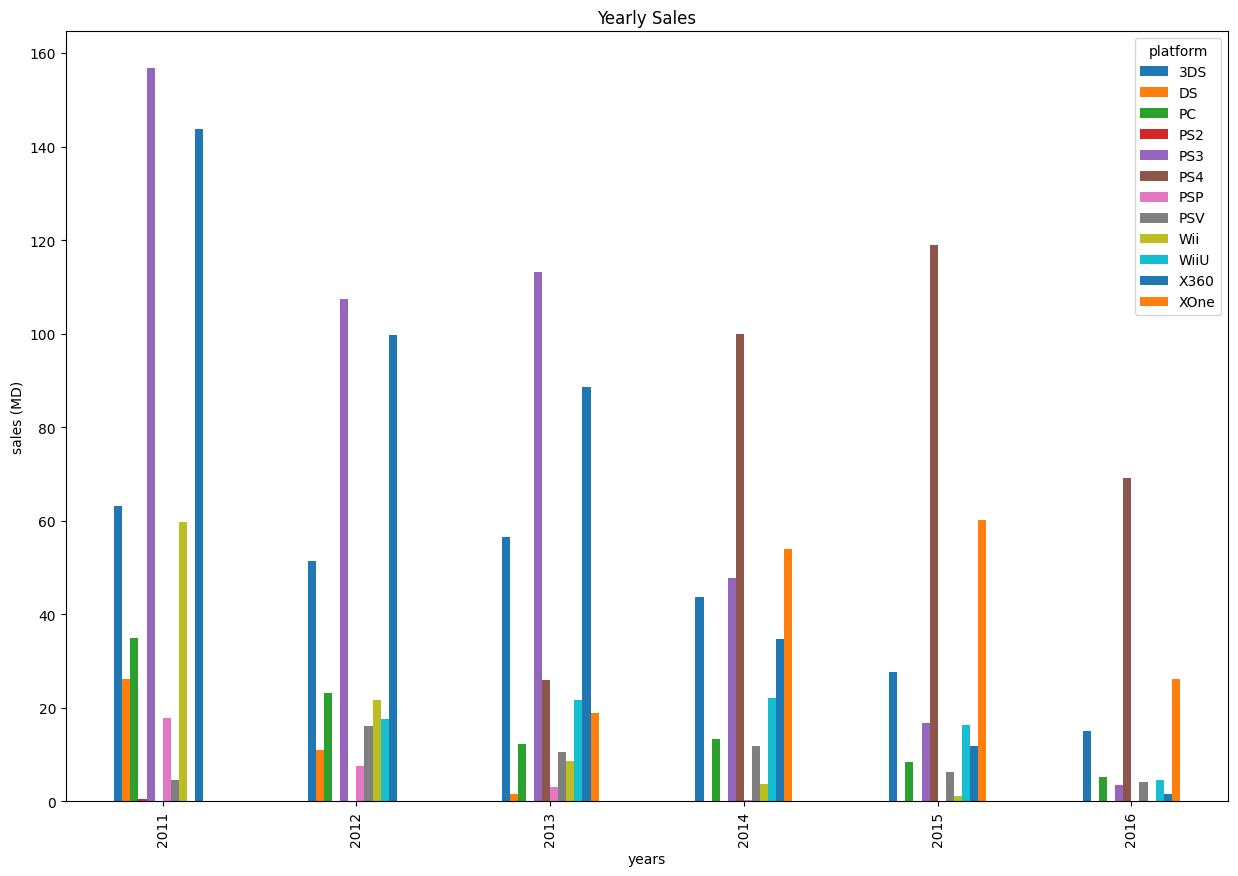

In [42]:
colores = plt.cm.coolwarm(np.linspace(0, 1, len(pivot_platforms_per_year)))
pivot_platforms_per_year.plot(
    kind='bar',
    title='Yearly Sales',
    xlabel='years',
    ylabel='sales (MD)',
    figsize=[15,10],
    #color=colores
)

In [43]:
# obtenemos los años transcurridos para el tiempo en el mercado de cada plataforma
df_platforms_per_year.groupby('platform')['year_of_release'].max()-df_platforms_per_year.groupby('platform')['year_of_release'].min()

platform
3DS     5
DS      2
PC      5
PS2     0
PS3     5
PS4     3
PSP     4
PSV     5
Wii     5
WiiU    4
X360    5
XOne    3
Name: year_of_release, dtype: int32

Con respecto al gráfico obtenido, podemos observar varias cosas. En primer lugar, notamos que una plataforma puede desaparecer del mercado en un periodo de 5 años, mientras que las nuevas plataformas, pueden alcanzar su pico máximo de ventas en un periodo de 3 años. Por ejemplo, tenemos la plataforma PS4, que es relativamente nueva y recien lleva 4 años en el mercado.  
Así mismo, es interesante ver cómo algunas plataformas que antes dominaban el mercado, como el Xbox 360, han reducido sus ventas significativamente. Esto podría deberse a la aparición de nuevas versiones de la misma consola o a la competencia de otras plataformas, así como el lanzamiento de nuevos juegos que no son compatibles con las antiguas plataformas.

Con respecto a las ventas registradas en los últimos años, las plataformas que han experimentado un incremento en sus ventas o que han logrado mantenerse en el mercado a pesar del paso del tiempo, y por ello son más rentables, son XOne, PS4, 3DS, PC y WiiU.

### Ventas globales de todos los juegos, desglosados por plataforma.

In [44]:
# mostramos las ventas totales de cada plataforma en orden ascendente
df_sales_per_platform = df_last_games.groupby('platform')['total_sales'].sum()
print(df_sales_per_platform.sort_values())

platform
PS2       0.45
PSP      29.01
DS       38.73
PSV      53.81
WiiU     82.19
Wii      95.02
PC       97.68
XOne    159.32
3DS     257.81
PS4     314.14
X360    380.38
PS3     445.57
Name: total_sales, dtype: float64


count     12.000000
mean     162.842500
std      149.576645
min        0.450000
25%       50.040000
50%       96.350000
75%      271.892500
max      445.570000
Name: total_sales, dtype: float64


<Axes: xlabel='total_sales'>

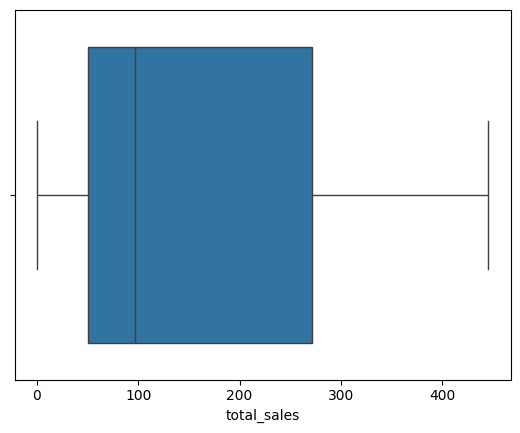

In [45]:
print(df_sales_per_platform.describe())
sns.boxplot(x=df_sales_per_platform)

La distribución general de las ventas tiene un sego hacia la derecha. Según los datos, el 75% de las plataformas registra ventas por debajo de los 270 millones de dólares (mdd), mientras que la plataforma con el mayor ingreso alcanza los 445 mdd. La desviación estándar, que mide la dispersión de los datos con respecto a la media, es alta. Esto significa que los valores varían significativamente en relación al promedio. Además, los datos presentan un sesgo hacia la derecha, lo que indica que la mayoría de las cifras están por encima de la mediana.  
Veamos el desglose por plataforma.

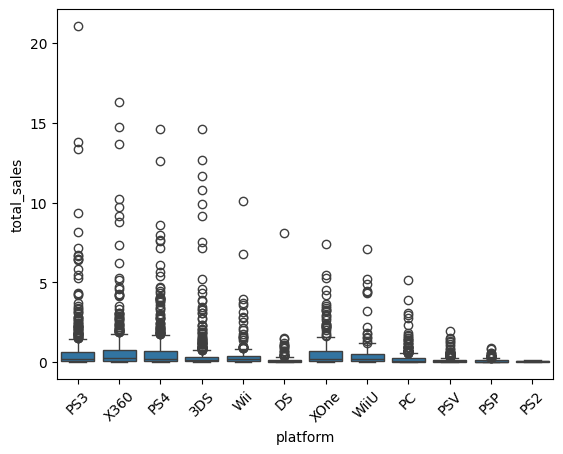

In [46]:
# distribución de las ventas por plataforma
sns.boxplot(x='platform', y='total_sales', data=df_last_games)
plt.xticks(rotation=45)
plt.show()

In [47]:
# distribución de los datos para la plataforma PS3
df_last_games[df_last_games['platform']=='PS3']['total_sales'].describe()

count    708.000000
mean       0.629336
std        1.451388
min        0.010000
25%        0.070000
50%        0.210000
75%        0.640000
max       21.050000
Name: total_sales, dtype: float64

In [48]:
# vemos el número de juegos con ventas mayores a 1 millón de dolares para la plataforma con más ventas
print("Número de juegos con menos de 1 mmd en ventas, para el PS3:",(df_last_games[df_last_games['platform']=='PS3']['total_sales']<=1).sum())
print("Número total de juegos de PS3:", df_last_games[df_last_games['platform']=='PS3']['name'].count())

Número de juegos con menos de 1 mmd en ventas, para el PS3: 603
Número total de juegos de PS3: 708


Podemos observar que la gran mayoría de videojuegos no superan el millón de dolares en ventas y que solo un porcentaje mínimo llega a alcanzar hasta 21 mdd, en el caso del PS3. Intentemos eliminar los outliers para tener un dataset más representativo de los datos.

In [49]:
# filtramos los juegos con 1 millón máximo de ventas
df_last_games = df_last_games[df_last_games['total_sales']<=1]

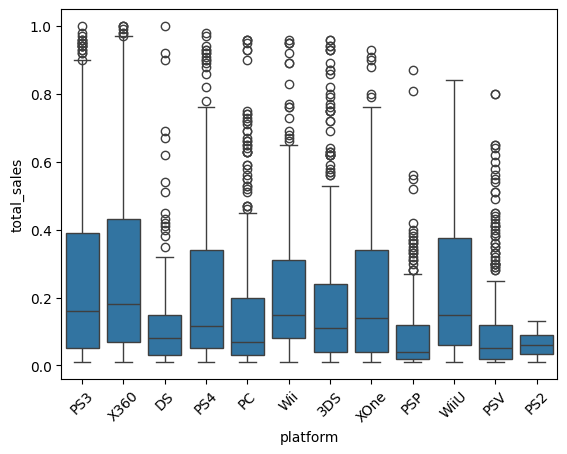

In [50]:
# distribución de las ventas por plataforma
sns.boxplot(x='platform', y='total_sales', data=df_last_games)
plt.xticks(rotation=45)
plt.show()

### Reseñas
Analizaremos como las reseñas de la crítica y de los usarios influyen en la compra de los videojuegos para una plataforma.

In [51]:
# Plataforma por número de lanzamientos
df_last_games.groupby('platform')['name'].count().sort_values()

platform
PS2       7
WiiU    127
DS      177
Wii     179
XOne    196
PSP     312
PS4     314
PC      371
X360    405
PSV     422
3DS     464
PS3     603
Name: name, dtype: int64

Elegimos la consola PS3 por tener un mayor número de títulos en el dataset.

#### Puntuación de la crítica

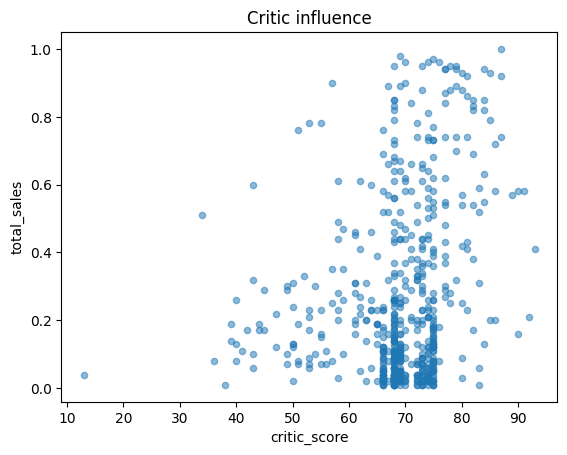

In [52]:
df_games_ps3 = df_last_games[df_last_games['platform']=='PS3']
df_games_ps3.plot(
    x='critic_score',
    y='total_sales', 
    kind='scatter', 
    alpha= 0.5,
    title = 'Critic influence'
)
plt.show()

In [53]:
#obtenemos el coeficiente de correlación
print('coeficiente de correlación:',df_games_ps3['total_sales'].corr(df_games_ps3['critic_score']))

coeficiente de correlación: 0.2483069915603095


Observamos que existe una correlación positiva entre la opinión de la crítica y las ventas, aunque esta correlación es bastante débil, apenas alcanzando un valor de 0.24. Esto sugiere que la influencia de la opinión crítica en las ventas es limitada.

#### Puntuación de los usuarios

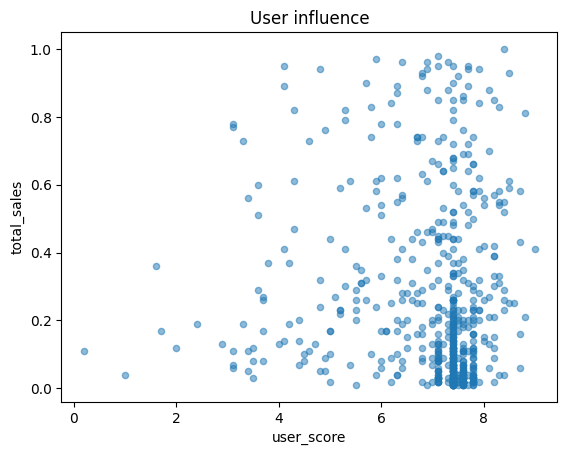

In [54]:
df_games_ps3.plot(
    x='user_score', 
    y='total_sales',
    kind='scatter', 
    alpha= 0.5,
    title = 'User influence'
)
plt.show()

In [55]:
#obtenemos el coeficiente de correlación
print('coeficiente de correlación:',df_games_ps3['total_sales'].corr(df_games_ps3['user_score']))

coeficiente de correlación: -0.08472773381534238


La correlación entre las ventas y la puntuación de los usuarios es incluso negativa, por lo que podemos inferir que no hay relación alguna. Esto índica que la opinión de la crítica tiene una mayor influencia en las ventas en comparación con la opinión de los usuarios.

### Ventas en distintas plataformas
Compararemos las ventas de algunos juegos en distintas platafomas

In [56]:
# Obtenemos los juegos con más diversidad de plataformas
games = df_last_games.groupby('name')['platform'].count().sort_values().tail(6)
games

name
Lego Star Wars: The Force Awakens    7
Terraria                             8
Angry Birds Star Wars                8
LEGO Jurassic World                  8
Lego Batman 3: Beyond Gotham         8
LEGO The Hobbit                      8
Name: platform, dtype: int64

<Axes: xlabel='platform', ylabel='total_sales'>

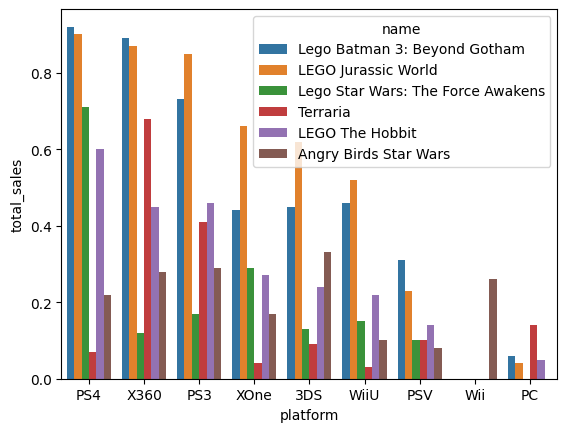

In [57]:
games = df_last_games[df_last_games['name'].isin(games.index)]
sns.barplot(data=games, x='platform', y='total_sales', hue='name')

Aunque las plataformas que los usarios eligen son muy variadas, podemos identificar algunas que destacan por su versatilidad y que tienen una mayor preferencia.

### Generos
Buscaremos cuales son los generos con mayores ventas.

In [58]:
# obtenemos el total en ventas y el número de titulos vendidos por cada genero
agg_dict = {'total_sales': 'sum', 'name': 'count'}
df_genres = df_last_games.groupby('genre').agg(agg_dict).sort_values('total_sales')
df_genres

,total_sales,name
genre,,
Puzzle,6.88,69
Strategy,15.40,112
Platform,20.40,95
Simulation,22.22,128
Racing,31.89,158
Fighting,32.37,142
Adventure,33.18,404
Misc,67.75,353
Shooter,72.06,236


Debido a la variabilidad en el número de videojuegos por género, no podemos determinar el éxito relativo de un género basándonos únicamente en las ventas totales. Sin embargo, podemos calcular una proporción en función de estos dos valores.

In [59]:
# obtenemos el monto promedio de ventas por genero
df_genres['mean']=df_genres['total_sales']/df_genres['name']
df_genres.sort_values('mean')

,total_sales,name,mean
genre,,,
Adventure,33.18,404,0.082129
Puzzle,6.88,69,0.099710
Strategy,15.40,112,0.137500
Simulation,22.22,128,0.173594
Misc,67.75,353,0.191926
Action,228.70,1141,0.200438
Racing,31.89,158,0.201835
Role-Playing,84.95,410,0.207195
Platform,20.40,95,0.214737


En promedio, los juegos con mayores ingresos son los shooters, seguidos por los videojuegos de deportes, y en tercer lugar se encuentran los videojuegos de peleas.


## Perfil de usuario por región

### Las cinco principales plataformas para cada región

In [60]:
print(df_last_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(), '\n')
print(df_last_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(), '\n')
print(df_last_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(), '\n')
print(df_last_games.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head())

platform
X360    66.06
PS3     58.96
3DS     27.09
XOne    25.59
PS4     24.00
Name: na_sales, dtype: float64 

platform
PS3     45.94
PC      36.72
X360    34.58
PS4     27.98
3DS     17.88
Name: eu_sales, dtype: float64 

platform
3DS    37.74
PS3    32.22
PSP    24.04
PSV    20.27
PS4     8.43
Name: jp_sales, dtype: float64 

platform
PS3     19.42
PS4     10.12
X360     9.67
PC       6.35
PSV      4.83
Name: other_sales, dtype: float64


En Norteamérica, las ventas más altas provienen de la consola Xbox 360.  
En Europa, la plataforma líder en ventas es la PS3.  
En Japón, la preferida es la Nintendo 3DS.  
En otros países, las ventas que predominan son las de la consola PS3.  
Podemos observar que el PS3 es una constante dentro de las plataformas principales de cada región.

### Los cinco principales géneros para cada región

In [61]:
print(df_last_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(), '\n')
print(df_last_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(), '\n')
print(df_last_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(), '\n')
print(df_last_games.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head())

genre
Action          89.75
Sports          39.52
Misc            32.92
Shooter         32.13
Role-Playing    25.02
Name: na_sales, dtype: float64 

genre
Action          72.80
Shooter         28.64
Sports          25.83
Role-Playing    16.25
Misc            16.12
Name: eu_sales, dtype: float64 

genre
Action          44.02
Role-Playing    37.92
Misc            13.23
Adventure       11.67
Sports           9.18
Name: jp_sales, dtype: float64 

genre
Action          22.13
Sports           8.86
Shooter          8.59
Role-Playing     5.76
Misc             5.48
Name: other_sales, dtype: float64


Podemos observar que para todas las regiones, el genero de Acción ocupa el prime lugar dentro de las ventas, seguidos por los mismos generos en diferente orden, Deportes, "Misc", Shooter y Role-Playing. Con la diferencia que en Japón también aparece el genero Aventura dentro de los primeros puestos.

### Clasificación de ESRB por región

In [62]:
print(df_last_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head())
print(df_last_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head())
print(df_last_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head())
print(df_last_games.groupby('rating')['other_sales'].sum().sort_values(ascending=False).head())

rating
T       76.81
E       76.27
M       67.41
E10+    57.00
EC       0.42
Name: na_sales, dtype: float64
rating
E       62.13
T       56.60
M       56.57
E10+    40.86
RP       0.03
Name: eu_sales, dtype: float64
rating
T       83.93
E       39.48
M       10.95
E10+     4.52
EC       0.00
Name: jp_sales, dtype: float64
rating
T       18.95
E       17.65
M       17.08
E10+    12.49
EC       0.03
Name: other_sales, dtype: float64


En las todas las regiones, las cuatro clasificaciones principales son las mismas. Norteamérica, Japón y otros países comparten el mismo orden para las tres principales clasificaciones: 'T' (adolescentes +13), 'E' (para todos) y 'M' (maduro +17) . Sin embargo, en Europa, el orden es un poco distinto, y los videojuegos con más ventas tienen la clasificación: 'E' (para todos).

## Hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Para esta hipótesis, tomaremos la premisa original como la hipótesis nula. Comprobaremos cuál es la probabilidad de que no haya ninguna diferencia entre las calificación para estas dos plataformas.  
Por lo tanto, la hipótesis alternativa, será:"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes".

In [79]:
# extraemos una muestra de 50 elementos de las calificaciones de los usuarios para cada plataforma
sample_xone = df_last_games[df_last_games['platform']=='XOne']['user_score'].sample(n=50)
sample_pc = df_last_games[df_last_games['platform']=='PC']['user_score'].sample(n=50)

# comprobamos si las varianzas son aproximadamente iguales
print('varianza 1:', sample_xone.var())
print('varianza 2:', sample_pc.var())

varianza 1: 1.2684122448979591
varianza 2: 2.434387755102041


In [80]:
alpha = 0.05  # establecemos el nivel de significancia estadística crítica en 5%

results = st.ttest_ind(sample_xone, sample_pc, equal_var = False) # las varianzas son diferentes, asignamos equal_var = False

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el nivel de significancia
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.2201887291639875
No podemos rechazar la hipótesis nula


Al parecer la posibilidad de que ambas plataformas tengan la misma calificación, es lo suficientemente alta para no rechazar la hipótesis nula. Hay una probabilidad del 22% de que, en promedio, las plataformas Xbox One y PC tengan calificaciones iguales.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Esta hipótesis no se pude comprobar directamente, puesto que se tiene que partir de la igualdad. Por lo cuál se tomará la siguiente premisa comp hipótesis nula:  
"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales"  
y la hipótesis alternativa sería la premisa original.

In [81]:
# extraemos una muestra de 50 elementos de las calificaciones de los usuarios para cada genero
sample_action = df_last_games[df_last_games['genre']=='Action']['user_score'].sample(n=50)
sample_sports = df_last_games[df_last_games['genre']=='Sports']['user_score'].sample(n=50)

# comprobamos si las varianzas son aproximadamente iguales
print('varianza 1:', sample_action.var())
print('varianza 2:', sample_sports.var())

varianza 1: 1.4169632653061226
varianza 2: 2.8164285714285717


In [82]:
alpha = 0.05  # establecemos el nivel de significancia estadística crítica en 5%

results = st.ttest_ind(sample_action, sample_sports, equal_var = False) # las varianzas son diferentes, asignamos equal_var = False

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el nivel de significancia
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.0042510673551072195
Rechazamos la hipótesis nula


El valor p, que determina la probabilidad de que ambos generos tengan la misma calificación promedio por parte de  los usarios, es más bajo que el nivel de significancia establecido. Por esta razón, rechazamos la hipótesis núla y podemos decir que es altamente probable que las calificaciones promedio de los dos géneros sean diferentes.

## Conclusión

En este proyecto se obtuvieron diferentes estadísticas para determinar cuál podría ser una campaña prometedora para el año siguiente.

Inicialmente, se analizó el número de lanzamientos anuales, esto nos ayudo a definir un periodo en el que obtendríamos resultados más relevantes, ignorando los años anteriores en los que el número de lanzamientos era menor. Y obtuvimos que los lanzamientos anuales han decrecido en los últimos años, quedándonos con una cantidad promedio de entre 500 y 600 lanzamientos por año.

Posteriormente, analizamos el comportamiento de diversas plataformas a través de los años para determinar el promedio de vida de una plataforma en el mercado. Y descubrimos que, en general, las plataformas tienen un tiempo en el mercado aproximado de 5 años, alcanzando su pico máximo de ventas en un periodo de 3 años. Por lo tanto, resultará conveniente desarrollar juegos para plataformas que recientemente han ingresado al mercado y han registrado ventas significativas, como la Xbox One y la PS4. Así como es importante considerar la compatibilidad con consolas que, aunque llevan varios años en el mercado, aún mantienen un nivel relevante de ventas, como la Nintendo 3DS, Wii U y PC.

Asimismo, concluimos que factores como las calificaciones otorgadas por la crítica y los usuarios no tienen una influencia determinante sobre las ventas. Por lo tanto, no es necesario considerarlos como elementos clave en nuestro análisis.

Además, comprobamos cuales eran las plataformas preferidas para jugar ciertos títulos, así como la versatilidad de cada plataforma en cuanto a la compatibilidad con los diferentes juegos, siendo las plataformas preferidas la PS4, Xbox 360, PS3, Xbox One y Nintendo 3DS.

También hicimos un análisis entorno a las ventas promedio de los diferentes géneros, identificando que los géneros con más ventas son 'Shooter', 'Sports' y 'Fighting'.

Por otra parte, se realizó un estudio por región para identificar las principales plataformas, géneros y clasificaciones de videojuegos con mayores ventas.  
En términos generales, se concluyó que la PS3 representa una de las mejores opciones en cualquier región, liderando las ventas y posicionándose consistentemente entre los dos primeros lugares. De manera específica, se observó que la Xbox 360 y la Nintendo 3DS son apuestas estratégicas en Norteamérica y Japón, respectivamente.  
En cuanto a los géneros, 'Acción' destaca como el más vendido en todas las regiones, seguido por 'Sports' en Norteamérica y otros países, 'Shooter' en Europa y 'Role-Playing' en Japón.  
Respecto a las clasificaciones, los videojuegos con categoría 'T' (adolescentes +13), 'E' (para todos) y 'M' (maduro +17) predominan en ventas, manteniendo ese orden en Norteamérica, Japón y otros países. Sin embargo, en Europa los juegos más vendidos pertenecen principalmente a la clasificación 'E' (para todos).

Por último, mediante las pruebas de hipótesis, comprobamos que es probable que las plataformas Xbox One y PC tengan calificaciones promedio iguales y los géneros de Acción y Deportes tengan calificaciones promedio diferentes.